In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from thor.option.default_input import input_options
from thor.data.aura import generate_operational_urls 
from thor.data.utils import download_file, unzip_file, consolidate_netcdf
from thor.data.odim import convert_odim
import xarray as xr
import tempfile

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
notebook_name = "input.ipynb"

In [4]:
options = input_options(
    name="operational",
    # start='2022-02-01T12:00:00',
    # end='2022-02-01T18:30:00',
    level="1b",
    radar="63",
    format="ODIM",
    parent="https://dapds00.nci.org.au/thredds/fileServer/rq0",
    grid_shape=(51, 121, 121),
    grid_limits=((0, 25000), (-150000, 150000), (-150000, 150000)),
    fields=['reflectivity', 'reflectivity_horizontal']
)
options

{'name': 'operational',
 'start': '2005-11-13T12:00:00',
 'end': '2005-11-13T22:00:00',
 'level': '1b',
 'version': '2020',
 'format': 'ODIM',
 'timestep': None,
 'start_latitude': None,
 'end_latitude': None,
 'start_longitude': None,
 'end_longitude': None,
 'parent': 'https://dapds00.nci.org.au/thredds/fileServer/rq0',
 'radar': '63',
 'grid_shape': (51, 121, 121),
 'grid_limits': ((0, 25000), (-150000, 150000), (-150000, 150000)),
 'fields': ['reflectivity', 'reflectivity_horizontal']}

In [5]:
urls = generate_operational_urls(options)
urls

['https://dapds00.nci.org.au/thredds/fileServer/rq0/level_1b/63/grid/2005/63_20051113_grid.zip',
 'https://dapds00.nci.org.au/thredds/fileServer/rq0/level_1b/63/grid/2005/63_20051114_grid.zip']

In [6]:
filepath = download_file(urls[0], '/home/ewan/Documents/turbulence_postdoc/demo_data/')

2024-04-16 17:42:51,794 - thor.data.utils - DEBUG - /home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid.zip already exists.


In [7]:
extracted_filepaths, dir_size = unzip_file(filepath)

In [16]:
sorted(extracted_filepaths)

['/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_022004_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_023004_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_024003_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_025003_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_030004_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_031004_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_032003_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_033004_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_034003_grid.nc',
 '/home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113_grid/63_20051113_035004_grid.nc',
 '/home/ewan/Documen

In [12]:
dataset = consolidate_netcdf(extracted_filepaths, fields=['corrected_reflectivity', 'latitude', 'longitude'])

In [7]:
dataset = convert_odim(extracted_filepaths, options)

2024-04-16 15:42:02,793 - thor.data.odim - DEBUG - Converting /home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113.pvol/63_20051113_022004.pvol.h5 to pyart.
2024-04-16 15:42:02,952 - thor.data.odim - DEBUG - Gridding /home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113.pvol/63_20051113_022004.pvol.h5.
2024-04-16 15:42:08,018 - thor.data.odim - DEBUG - Converting {filepath} to xarray.
2024-04-16 15:52:34,787 - thor.data.odim - DEBUG - Converting /home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113.pvol/63_20051113_023004.pvol.h5 to pyart.
2024-04-16 15:52:34,928 - thor.data.odim - DEBUG - Gridding /home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113.pvol/63_20051113_023004.pvol.h5.
2024-04-16 15:52:37,789 - thor.data.odim - DEBUG - Converting {filepath} to xarray.
2024-04-16 15:52:54,017 - thor.data.odim - DEBUG - Converting /home/ewan/Documents/turbulence_postdoc/demo_data/63_20051113.pvol/63_20051113_024003.pvol.h5 to pyart.
2024-04-16 15:52:54,181 

In [17]:
dataset = dataset.sortby('time')


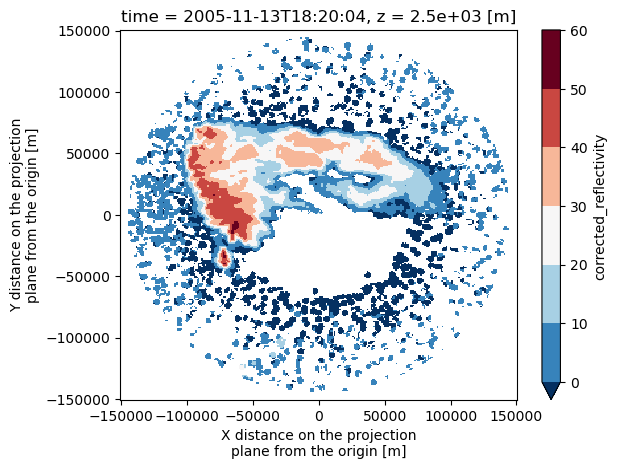

In [13]:
dataset['corrected_reflectivity'].isel(time=0).isel(z=5).plot(levels=np.arange(0, 70, 10))

In [ ]:
from thor.data.utils import unzip_url_contents

In [ ]:
with tempfile.TemporaryDirectory() as temp_dir:
    a, b = unzip_url_contents(urls[0], temp_dir)


2024-04-13 21:51:06,778 - thor.data.utils - DEBUG - Downloading https://dapds00.nci.org.au/thredds/fileServer/rq0/63/2005/vol/63_20051113.pvol.zip...


In [ ]:
sorted(a)

[PosixPath('/tmp/tmpylkx7lzy/63_20051113_022004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_023004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_024003.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_025003.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_030004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_031004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_032003.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_033004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_034003.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_035004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_040004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_041004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_042004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_043003.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_044004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_045004.pvol.h5'),
 PosixPath('/tmp/tmpylkx7lzy/63_20051113_050004.pvol.h5'

In [ ]:
urls[0]

'https://dapds00.nci.org.au/thredds/dodsC/rq0/level_1/odim_pvol/63/2005/vol/63_20051113.pvol.zip'

In [ ]:
ds = xr.open_dataset(urls[0], engine="netcdf4")

ds

<xarray.Dataset> Size: 16MB
Dimensions:       (time: 144, longitude: 117, latitude: 117)
Coordinates:
  * time          (time) datetime64[ns] 1kB 2005-11-13 ... 2005-11-13T23:50:00
  * longitude     (longitude) float32 468B 129.7 129.7 129.8 ... 132.4 132.4
  * latitude      (latitude) float32 468B -13.55 -13.53 -13.51 ... -10.97 -10.94
Data variables:
    isfile        (time) int32 576B ...
    reflectivity  (time, latitude, longitude) float64 16MB ...
Attributes: (12/42)
    title:                         Radar reflectivity
    summary:                       Daily timeseries of the equivalent reflect...
    source:                        radar
    date_created:                  2018-07-12T13:42:19.858084
    Conventions:                   CF-1.6, ACDD-1.3
    history:                       October 2017 recalibration: Thu Aug  3 11:...
    ...                            ...
    origin_longitude:              131.044
    origin_altitude:               50
    country:                       Australia
    state:                         NT
    site_name:                     Gunn Pt
    naming_authority:              au.org.nci

In [ ]:
ds["reflectivity"]

<xarray.DataArray 'reflectivity' (time: 1, z: 41, y: 117, x: 117)> Size: 2MB
[561249 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 8B 2005-11-13T12:00:09
  * x        (x) float64 936B -1.45e+05 -1.425e+05 ... 1.425e+05 1.45e+05
  * y        (y) float64 936B -1.45e+05 -1.425e+05 ... 1.425e+05 1.45e+05
  * z        (z) float64 328B 0.0 500.0 1e+03 1.5e+03 ... 1.9e+04 1.95e+04 2e+04
Attributes:
    long_name:              Reflectivity
    units:                  dBZ
    standard_name:          equivalent_reflectivity_factor
    coverage_content_type:  physicalMeasurement
    _ChunkSizes:            [  1  41 117 117]